# **Sorting Algorithms**

In [67]:
from typing import List, Callable, Dict
import heapq
import matplotlib.pyplot as plt
import timeit

In [68]:
test_list: list[int] = [64, 34, 25, 12, 22, 11, 90]

def run_tests(sorting_algorithm: Callable[[List[int]], List[int]]) -> None:
    print(f"Original List: {test_list}\nSorted List: {sorting_algorithm(test_list.copy())}\n")

## **Bubble Sort**

In [69]:
def bubble_sort(arr: List[int]) -> List[int]:
    n: int = len(arr)
    for i in range(n):
        swapped: bool = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]  # Swapping the elements
                swapped = True
        if not swapped:
            break
    return arr


In [70]:
print("Testing Bubble Sort:")
run_tests(bubble_sort)

Testing Bubble Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Selection Sort**

In [71]:
def selection_sort(arr: List[int]) -> List[int]:
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


In [72]:
print("Testing Selection Sort:")
run_tests(selection_sort)

Testing Selection Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Insertion Sort**

In [73]:
def insertion_sort(arr: List[int]) -> List[int]:
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [74]:
print("Testing Insertion Sort:")
run_tests(insertion_sort)

Testing Insertion Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Merge Sort**

In [75]:
def merge_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

def merge(left: List[int], right: List[int]) -> List[int]:
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result


In [76]:
print("Testing Merge Sort:")
run_tests(merge_sort)

Testing Merge Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Quick Sort**

In [77]:
def quick_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


In [78]:
print("Testing Quick Sort:")
run_tests(quick_sort)

Testing Quick Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Heap Sort**

In [79]:
def heap_sort(arr: List[int]) -> List[int]:
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

In [80]:
print("Testing Heap Sort:")
run_tests(heap_sort)

Testing Heap Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Counting Sort**

In [81]:
def counting_sort(arr: List[int]) -> List[int]:
    if not arr:
        return arr
    max_val = max(arr)
    count = [0] * (max_val + 1)
    output = [0] * len(arr)

    for num in arr:
        count[num] += 1

    for i in range(1, len(count)):
        count[i] += count[i - 1]

    for i in range(len(arr) - 1, -1, -1):
        output[count[arr[i]] - 1] = arr[i]
        count[arr[i]] -= 1

    return output


In [82]:
print("Testing Counting Sort:")
run_tests(counting_sort)

Testing Counting Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Radix Sort**

In [83]:
def radix_sort(arr: List[int]) -> List[int]:
    if not arr:
        return arr
    max_val = max(arr)
    exp = 1
    n = len(arr)
    output = [0] * n

    while max_val // exp > 0:
        counting_sort_exp(arr, exp, output)
        arr = output.copy()
        exp *= 10
    return arr


def counting_sort_exp(arr: List[int], exp: int, output: List[int]):
    n = len(arr)
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1

In [84]:
print("Testing Radix Sort:")
run_tests(radix_sort)

Testing Radix Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Bucket Sort**

In [85]:
def bucket_sort(arr: List[int]) -> List[int]:
    if len(arr) == 0:
        return arr

    min_val, max_val = min(arr), max(arr)
    bucket_range = (max_val - min_val) / len(arr)
    buckets = [[] for _ in range(len(arr) + 1)]

    for num in arr:
        index = int((num - min_val) / bucket_range)
        buckets[index].append(num)

    sorted_arr = []
    for bucket in buckets:
        sorted_arr += sorted(bucket)

    return sorted_arr


In [86]:
print("Testing Bucket Sort:")
run_tests(bubble_sort)

Testing Bucket Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Comparing Sorting Algorithms**

In [90]:
def compare_algorithms(algorithms: Dict[str, Callable[[List[int]], List[int]]], lists_to_sort: List[List[int]]) -> None:
    for name, algorithm in algorithms.items():
        times = []
        for lst in lists_to_sort:
            # Time the sorting algorithm on this list and repeat it 10 times for accuracy
            timer = timeit.Timer(lambda: algorithm(lst.copy()))
            times.append(timer.timeit(number=10))
        plt.plot([len(lst) for lst in lists_to_sort], times, label=name)

    plt.xlabel('List Length')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.show()


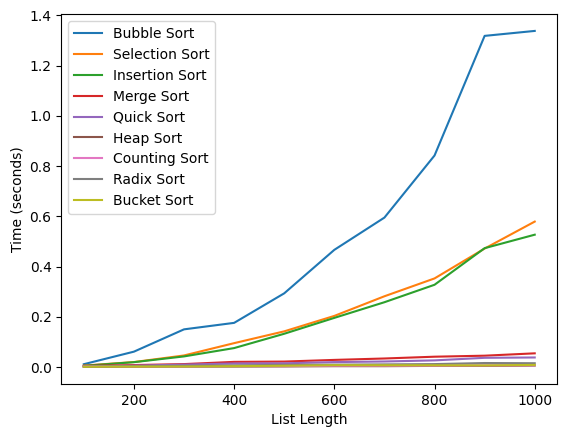

In [92]:
algorithms = {
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort,
    'Insertion Sort': insertion_sort,
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Heap Sort': heap_sort,
    'Counting Sort': counting_sort,
    'Radix Sort': radix_sort,
    'Bucket Sort': bucket_sort
}

# Generating some random test cases of different sizes
import random
lists_to_sort = [random.sample(range(1000), k=i) for i in range(100, 1001, 100)]

compare_algorithms(algorithms, lists_to_sort)